In [89]:
pip install keras_visualizer

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1 -> 23.2.1
[notice] To update, run: C:\Users\Apurva\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [90]:
pip install --upgrade keras


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1 -> 23.2.1
[notice] To update, run: C:\Users\Apurva\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [91]:
pip install keras==2.4.3

  Using cached Keras-2.4.3-py2.py3-none-any.whl (36 kB)
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.14.0 requires keras<2.15,>=2.14.0, but you have keras 2.4.3 which is incompatible.

[notice] A new release of pip is available: 23.1 -> 23.2.1
[notice] To update, run: C:\Users\Apurva\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [92]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import make_scorer
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [93]:
# Load your dataset (replace 'your_data.csv' with your actual dataset)
data = pd.read_csv('merged_file.csv')

In [94]:
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

In [95]:
# Fill NaN values with forward fill
data.fillna(method='bfill', inplace=True)

In [96]:
# Check for NaN values
print("Number of NaN values:", data.isnull().sum().sum())

Number of NaN values: 0


In [97]:
# Split the data into features (X) and target (y)
X = data.drop(['Miscellaneous electric load for the South Wing', 'Miscellaneous electric load for the North Wing',
               'Lighting load for the South Wing', 'Heating Ventilation and Air Conditioning load for the South Wing',
               'Heating Ventilation and Air Conditioning load for the North Wing'], axis=1)


In [98]:
# Define a list of target variables
target_columns = ['Miscellaneous electric load for the South Wing', 'Miscellaneous electric load for the North Wing',
                   'Lighting load for the South Wing', 'Heating Ventilation and Air Conditioning load for the South Wing',
                   'Heating Ventilation and Air Conditioning load for the North Wing']

In [99]:
# Use a fixed split technique (e.g., train on the first 80% of the data, test on the remaining 20%)
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]

In [100]:
rnn_models = {}

In [101]:
for target_column in target_columns:
    y_train = data[target_column][:train_size]
    y_test = data[target_column][train_size:]

In [104]:
X_train_reshaped = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_reshaped = X_test.values.reshape(X_test.shape[0], 1, X_test.shape[1])

In [106]:
# Build the RNN model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(1, X_train.shape[1])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error') # Train the model with early stopping
es = EarlyStopping(monitor='val_loss', patience=10)
model.fit(X_train_reshaped, y_train, epochs=100, validation_split=0.2, callbacks=[es])

Epoch 1/100


In [ ]:
  # Make predictions
rnn_predictions = model.predict(X_test_reshaped)

    # Calculate RMSE for each model
rnn_rmse = np.sqrt(mean_squared_error(y_test, rnn_predictions))
print(f"RNN RMSE for {target_column}: {rnn_rmse}")

    # Store the trained model
rnn_models[target_column] = model

NameError: name 'rnn_predictions' is not defined

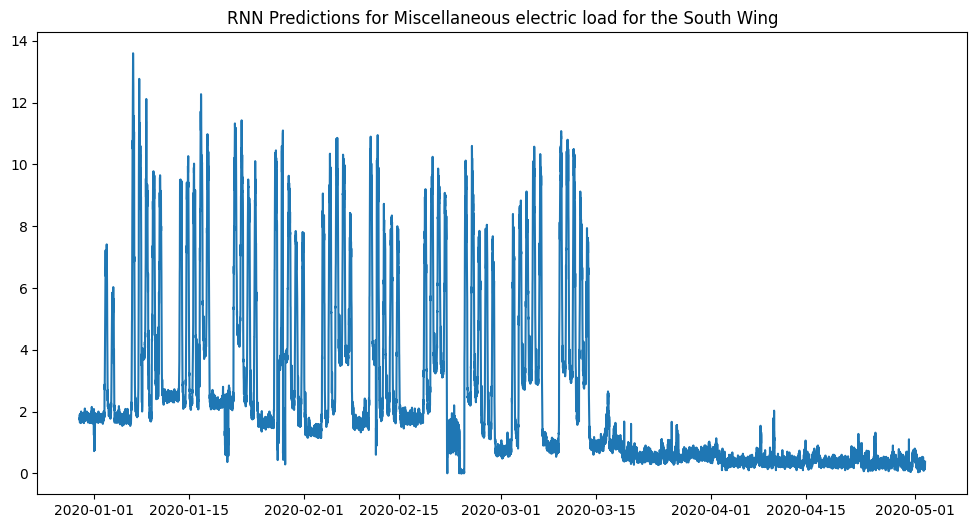

In [ ]:
# Visualize results for one of the models
plt.figure(figsize=(12, 6))
plt.title('RNN Predictions for Miscellaneous electric load for the South Wing')
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, rnn_predictions, label='Predicted')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, rnn_predictions)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, rnn_predictions)
print("Mean Absolute Error (MAE):", mae)

# Calculate R-squared (R^2)
r2 = r2_score(y_test, rnn_predictions)
print("R-squared (R^2):", r2)


NameError: name 'rnn_predictions' is not defined

In [ ]:
# Initialize empty dictionaries to store the scores
train_scores = {}
test_scores = {}


In [ ]:
# Calculate RMSE, MAE, and R-squared for the training set
y_train_pred = model.predict(X_train_reshaped)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

1617/1617 [==============================] - 2s 981us/step


In [ ]:
# Calculate RMSE, MAE, and R-squared for the test set
test_rmse = np.sqrt(mean_squared_error(y_test, rnn_predictions))
test_mae = mean_absolute_error(y_test, rnn_predictions)
test_r2 = r2_score(y_test, rnn_predictions)

In [ ]:
for target_column in target_columns:
    train_scores [target_column] = {
        'RMSE': train_rmse,
        'MAE': train_mae,
        'R-squared': train_r2
    }

    test_scores[target_column] = {
        'RMSE': test_rmse,
        'MAE': test_mae,
        'R-squared': test_r2
    }

    # Print the scores for each target variable
    print(f"Target Variable: {target_column}")
    print("Training Set Scores:")
    print(train_scores[target_column])
    print("Test Set Scores:")
    print(test_scores[target_column])
    print("\n")

Target Variable: Miscellaneous electric load for the South Wing
Training Set Scores:
{'RMSE': 10.274379444399313, 'MAE': 7.8799128296318806, 'R-squared': 0.4969531901279588}
Test Set Scores:
{'RMSE': 31.962671943282537, 'MAE': 15.004572722938487, 'R-squared': -36.86854719510971}


Target Variable: Miscellaneous electric load for the North Wing
Training Set Scores:
{'RMSE': 10.274379444399313, 'MAE': 7.8799128296318806, 'R-squared': 0.4969531901279588}
Test Set Scores:
{'RMSE': 31.962671943282537, 'MAE': 15.004572722938487, 'R-squared': -36.86854719510971}


Target Variable: Lighting load for the South Wing
Training Set Scores:
{'RMSE': 10.274379444399313, 'MAE': 7.8799128296318806, 'R-squared': 0.4969531901279588}
Test Set Scores:
{'RMSE': 31.962671943282537, 'MAE': 15.004572722938487, 'R-squared': -36.86854719510971}


Target Variable: Heating Ventilation and Air Conditioning load for the South Wing
Training Set Scores:
{'RMSE': 10.274379444399313, 'MAE': 7.8799128296318806, 'R-square

In [ ]:
# Create a pipeline for scaling and training the model
scaler = StandardScaler()
estimator = KerasRegressor(build_fn=create_lstm_model, verbose=0)
pipeline = Pipeline([("scaler", scaler), ("estimator", estimator)])

C:\Users\Apurva\AppData\Local\Temp\ipykernel_33100\2689896832.py:3: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasRegressor(build_fn=create_lstm_model, verbose=0)


In [ ]:
# Define custom scorer to use negative RMSE for optimization
neg_rmse = make_scorer(lambda y_true, y_pred: -np.sqrt(mean_squared_error(y_true, y_pred)), greater_is_better=False)
